In [1]:
import aacgmv2
import os
import sys
import warnings

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from itertools import chain
from mpl_toolkits.basemap import Basemap

import utils

from utils import local_data
from utils import window

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "station_data_series_tec.pkl.xz"), compression='xz')
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort.pkl'))

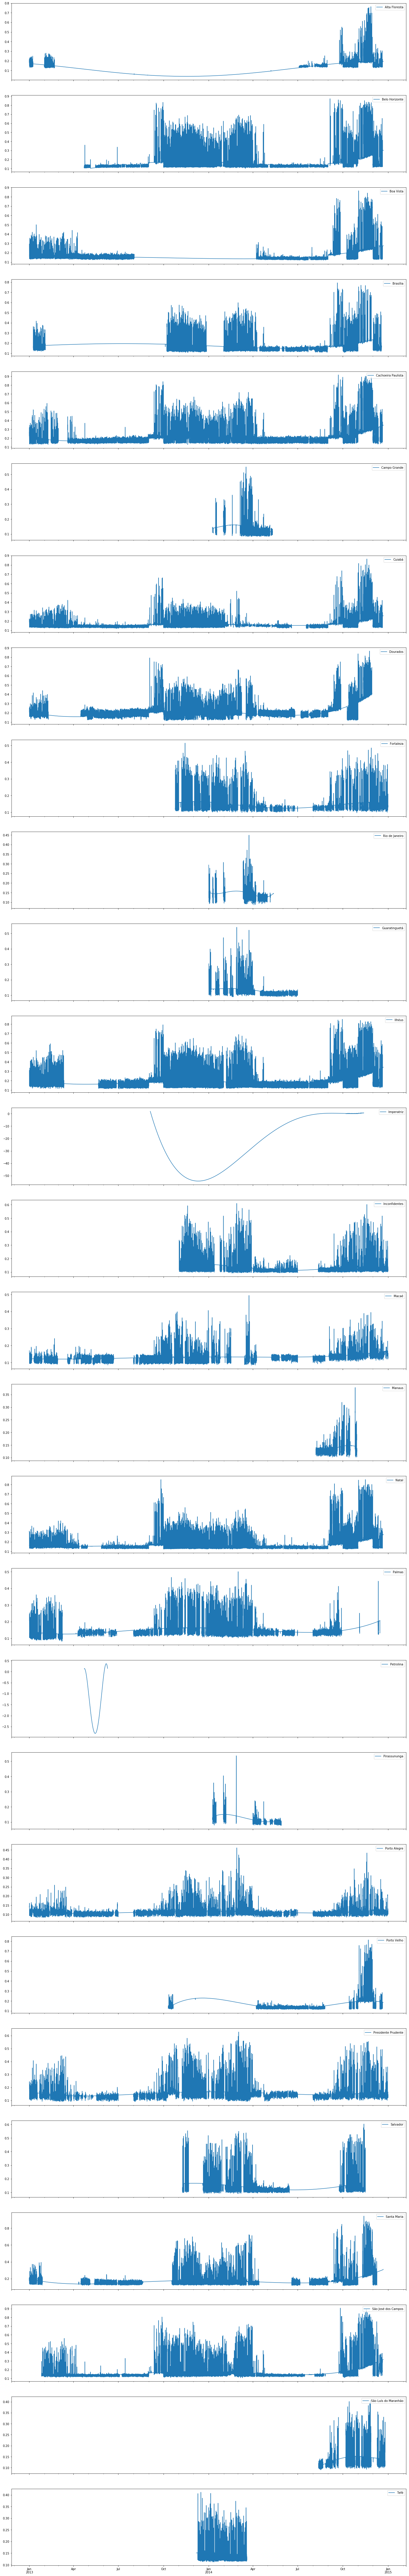

In [3]:
size = df_series_s4.columns.size
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(df_series_s4.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=(24, 160), ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right")

Analisando os dados os gráficos acima, optou-se por descartar as estações de Petrolina e Imperatriz, cujos idenfiticadores são respectivamentes 'pln' e 'imp'.

In [4]:
remove = ['imp', 'pln']
for i in remove:
    df_station = df_station[df_station.identificationstation != i]
    del df_series_s4[i]
    del df_series_vtec[i]
    

In [5]:
df_station

,identificationstation,height,latitude,longitude,state,city,city_heigh,city_latitude,city_longitude,mag_latitude,mag_longitude
city_name_correct,,,,,,,,,,,
Alta Floresta,afl,267.000,-9.870000,-55.900000,mt,alta floresta,264.0,-9.90000,-55.9000,-11.812189,16.212312
Belo Horizonte,bhz,858.000,-19.868500,-43.954200,mg,belo horizonte,767.0,-19.81570,-43.9542,-25.426147,24.786619
Boa Vista,bov,69.180,2.833920,-60.695380,rr,boa vista,76.0,2.81954,-60.6714,11.622177,14.848847
Brasília,bsa,1050.000,-15.764200,-47.869400,df,brasilia,1130.0,-15.78010,-47.9292,-24.348659,22.352744
Cachoeira Paulista,cpa,580.000,-22.410000,-45.000000,sp,cachoeira paulista,545.0,-22.67370,-44.9973,-24.456556,22.960540
Campo Grande,32,NaN,-20.497000,-54.615000,ms,campos grande,612.0,-20.44350,-54.6478,-21.417704,14.873907
Cuiabá,cub,278.000,-15.555200,-56.069800,mt,cuiaba,180.0,-15.59890,-56.0949,-14.336068,14.530440
Dourados,dou,756.120,-22.110000,-54.550000,ms,dourados,448.0,-22.22180,-54.8064,-23.627266,14.698554
Fortaleza,24,NaN,-3.742000,-38.539000,ce,fortaleza,14.0,-3.71839,-38.5434,NaN,NaN


Os dados de S4 englobam dois anos inteiros, o período começando em janeiro de 2013 e terminando em janeiro de 2015. Os dados de vtec por sua vez, restrigem-se a um intervalo menor. Assim, é necessário realizar um corte na série de dados de S4, de forma a ter o mesmo número de analises.

In [6]:
first_date = df_series_vtec.index[0].to_pydatetime()
last_date = df_series_vtec.index[-1].to_pydatetime()
df_series_vtec.shape

(12960, 26)

In [7]:
df_series_s4 = df_series_s4.ix[first_date:last_date]
df_series_s4.shape

(12960, 26)

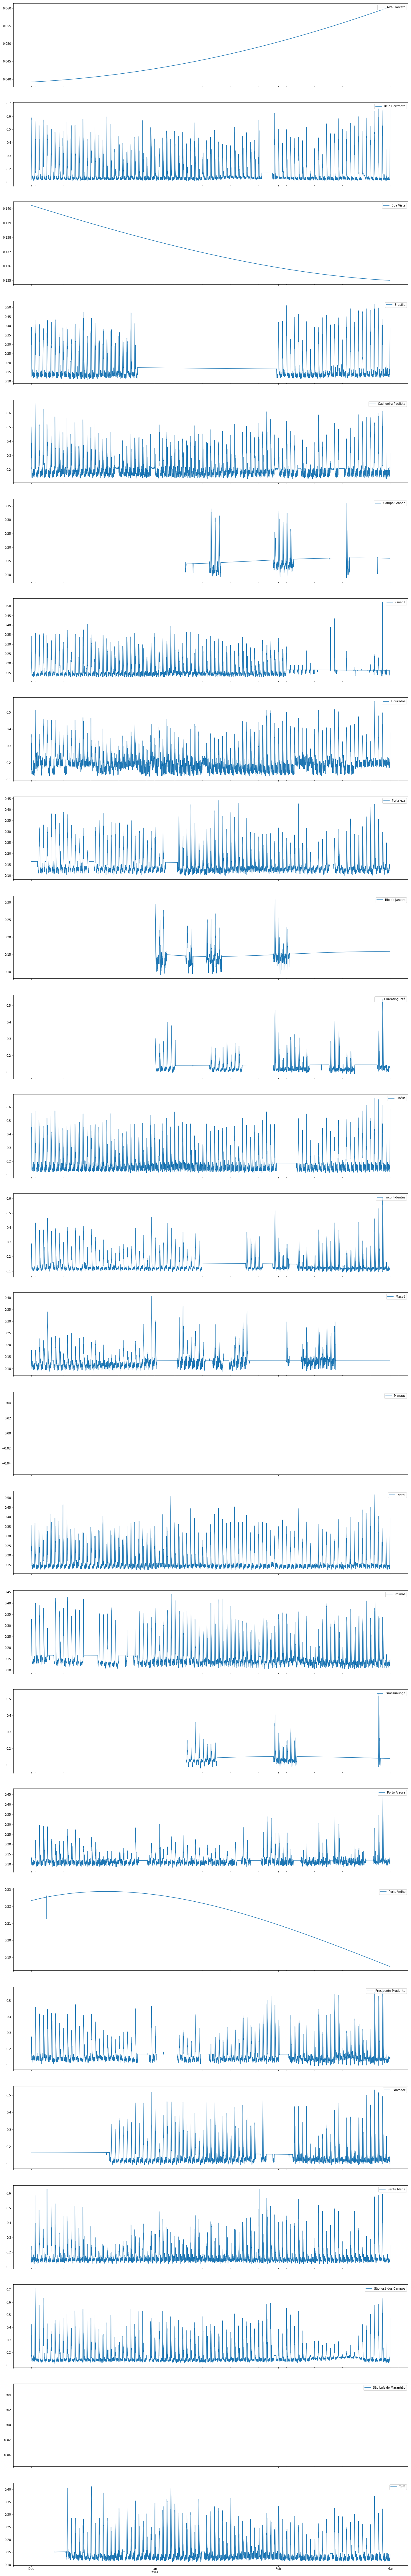

In [8]:
size = df_series_s4.columns.size
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(df_series_s4.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=(24, 160), ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right")


In [9]:
remove = ['afl', 'bov', '28', 'pvh', '29']
for i in remove:
    df_station = df_station[df_station.identificationstation != i]
    del df_series_s4[i]
    del df_series_vtec[i]

In [10]:
df_series_vtec.to_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_series_s4.to_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
df_station.to_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

In [11]:
mag_lat = df_station['mag_latitude'].values.ravel()
mag_lon = df_station['mag_longitude'].values.ravel()

dtime = dt.datetime(2013, 1, 1)
mag_meridians_lines = []
for lat, lon in zip(mag_lat, mag_lon):
    lats = np.linspace(-90, 90, 720)
    aux_geo_lat = []
    aux_geo_lon = []
    for i in lats:
        geo_lat, geo_lon, _ = aacgmv2.convert_latlon_arr(i, 
                                                         lon, 
                                                         0, 
                                                         dtime=dtime, 
                                                         code="A2G")
        aux_geo_lat.append(float(geo_lat))
        aux_geo_lon.append(float(geo_lon))
        
    mag_meridians_lines.append((aux_geo_lon, aux_geo_lat))

In [12]:
def draw_map(m, scale=0.2):
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 45), labels=[True, True, True, True])
    lons = m.drawmeridians(np.linspace(-180, 180, 90), labels=[True, True, True, True])
    
    # keys contain the plt.line 2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='b')

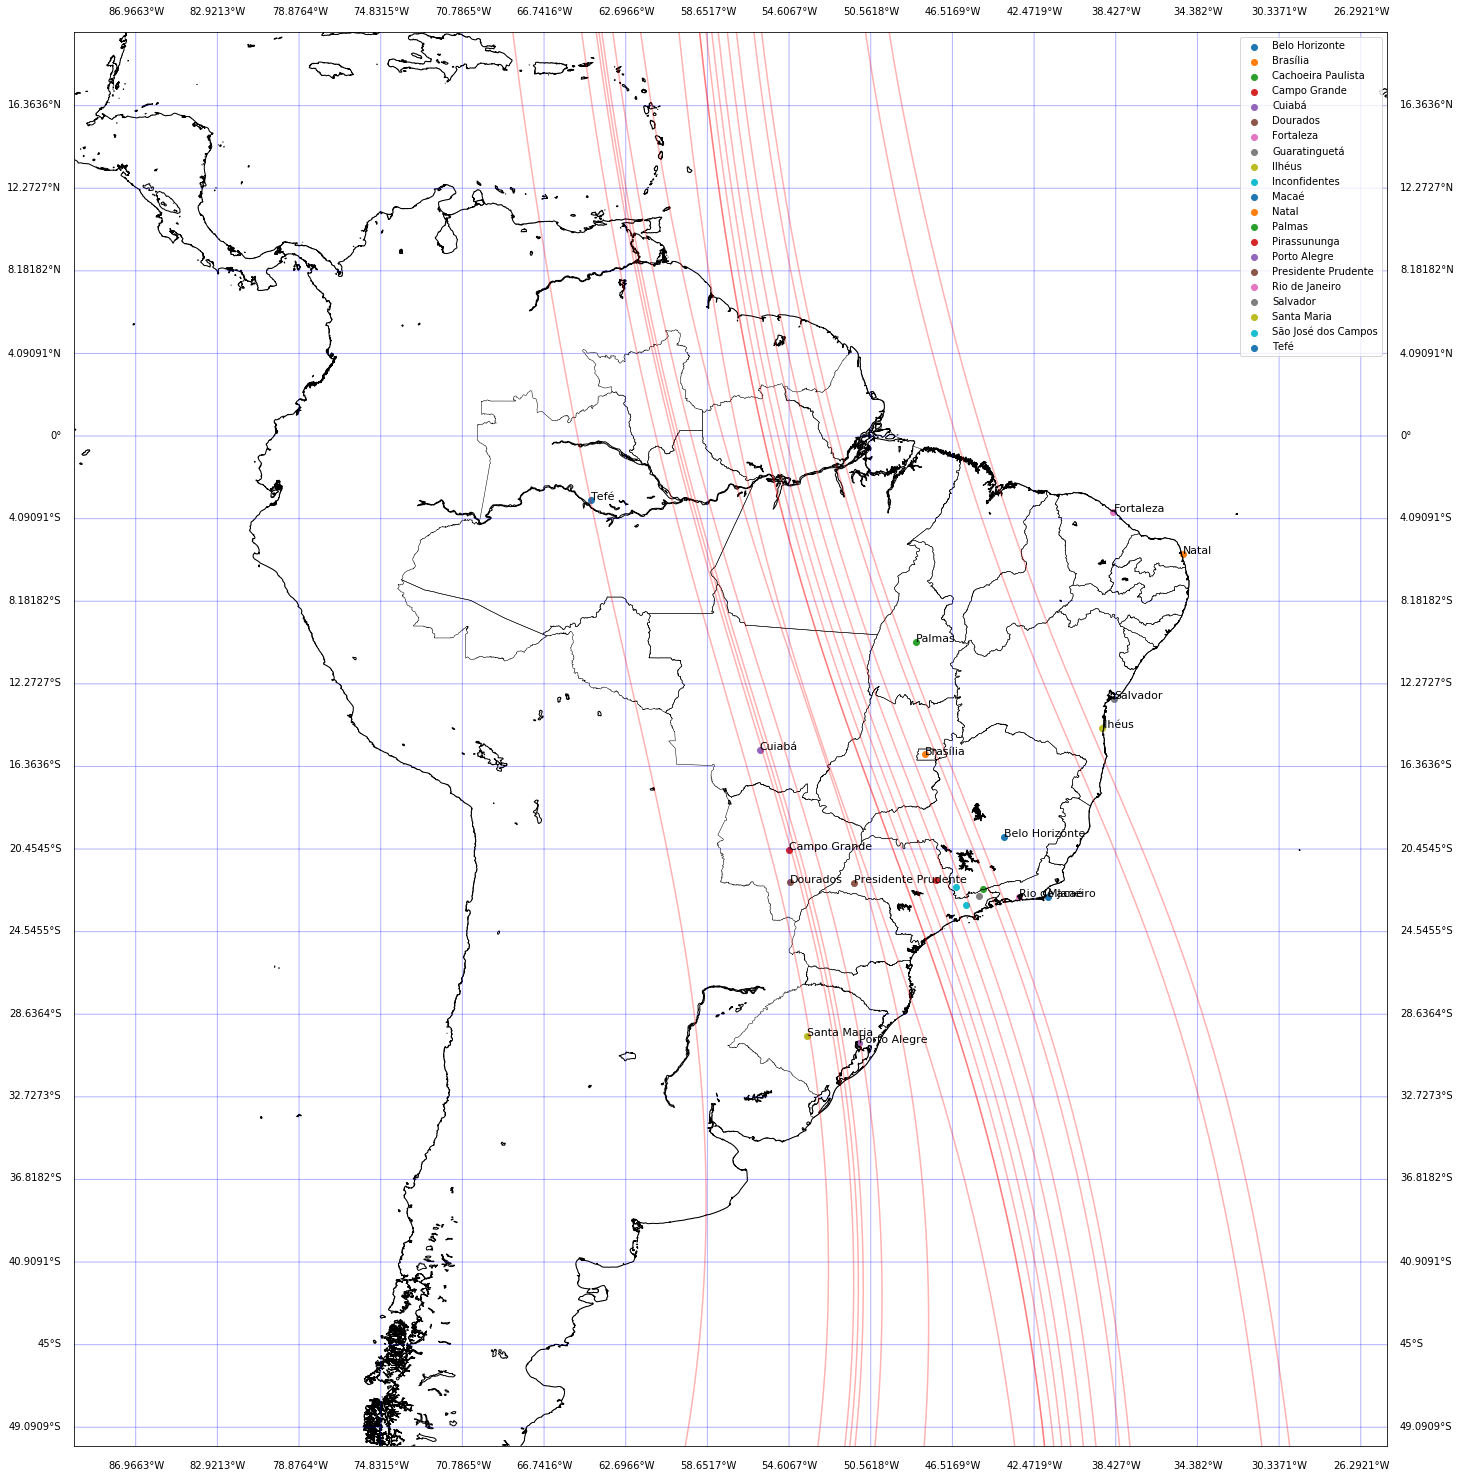

In [13]:
fig = plt.figure(figsize=(26, 26), edgecolor='w')
m = Basemap(projection='cyl',
            resolution='f',
            llcrnrlat=-50,
            urcrnrlat=20,
            llcrnrlon=-90,
            urcrnrlon=-25)
m.drawcoastlines()
m.readshapefile(os.path.join(local_data, 'estados_2010/estados_2010'), 'estados', )
draw_map(m)

for i in mag_meridians_lines:
    m.plot(i[0], i[1], latlon=True, color='r', alpha=0.3)

for i in df_station.itertuples():
    x, y = m(i.longitude, i.latitude)
    m.scatter(x, y, label=i.Index)
    if i.Index not in ['São José dos Campos', 'Cachoeira Paulista', 'Guaratinguetá', 'Inconfidentes', 'Pirassununga']:
        plt.text(x, y, i.Index, fontsize=11)

plt.legend()
plt.savefig('./images/map_stations_re.svg', format='svg', dpi=1000)
plt.show()